In [82]:
import torch
import pandas as pd
import torch.nn as nn
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
import pandas as pd
import matplotlib.pyplot as plt

In [83]:
data = pd.read_csv('./data/balanced_sclaer_dataset_diabetes.csv')
data

,Unnamed: 0,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_012
0,0,0.000000,0.000000,1.000000,0.174419,1.000000,0.0,0.0,1.000000,1.000000,...,0.000000,0.250000,0.066667,0.000000,0.000000,0.000000,0.166667,0.600000,0.000000,0.0
1,1,0.000000,1.000000,1.000000,0.220930,1.000000,0.0,1.0,1.000000,1.000000,...,0.000000,0.500000,0.000000,0.000000,0.000000,1.000000,0.583333,0.800000,0.857143,2.0
2,2,0.000000,0.000000,1.000000,0.174419,0.000000,0.0,0.0,1.000000,0.000000,...,0.000000,0.500000,0.100000,0.000000,0.000000,0.000000,0.500000,0.600000,0.714286,0.0
3,3,0.000000,0.000000,1.000000,0.151163,1.000000,0.0,0.0,1.000000,1.000000,...,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.500000,1.000000,0.857143,0.0
4,4,1.000000,1.000000,1.000000,0.209302,1.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.500000,1.000000,0.000000,0.000000,0.000000,0.250000,0.600000,1.000000,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105286,105286,1.000000,1.000000,1.000000,0.250595,0.775591,0.0,0.0,0.000000,0.000000,...,0.224409,0.806102,0.462599,0.500000,1.000000,0.775591,0.750000,0.955118,0.728909,1.0
105287,105287,1.000000,1.000000,1.000000,0.243025,0.900157,0.0,0.0,1.000000,0.099843,...,0.000000,1.000000,1.000000,1.000000,0.099843,0.000000,0.591654,0.619969,0.014263,1.0
105288,105288,1.000000,0.699485,1.000000,0.330221,0.699485,0.0,0.0,0.300515,1.000000,...,0.000000,0.424871,0.000000,0.000000,0.000000,1.000000,0.525043,0.600000,1.000000,1.0
105289,105289,0.508129,0.508129,1.000000,0.250095,0.508129,0.0,0.0,0.491871,0.508129,...,0.000000,0.372968,0.016396,0.066667,0.000000,0.000000,0.500000,1.000000,0.929733,1.0


In [84]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)
data.isnull().sum().sum()


0

In [85]:
y = data["Diabetes_012"].values
X = data.drop(["Diabetes_012"], axis=1).values

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((89497, 21), (15794, 21), (89497,), (15794,))

In [88]:
batch_size = 256

In [89]:
train_ds = TensorDataset(torch.from_numpy(X_train).type(torch.float32), torch.from_numpy(y_train).type(torch.long))
train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True)

In [90]:
x_c, y_c = next(iter(train_dl))
x_c.shape, y_c.shape

(torch.Size([256, 21]), torch.Size([256]))

In [91]:
test_ds = TensorDataset(torch.from_numpy(X_test), torch.from_numpy(y_test))
test_dl = DataLoader(test_ds, batch_size=batch_size, shuffle=True)

In [92]:
class MyClassifierModel(nn.Module):
    def __init__(self):
        super(MyClassifierModel, self).__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(21, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 3),
            nn.LogSoftmax(dim=1)
        )
        
    def forward(self, x):
        y = self.linear_relu_stack(x)
        return y

In [93]:
model=MyClassifierModel()
print(model)

MyClassifierModel(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=21, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): ReLU()
    (6): Linear(in_features=64, out_features=32, bias=True)
    (7): ReLU()
    (8): Linear(in_features=32, out_features=3, bias=True)
    (9): LogSoftmax(dim=1)
  )
)


In [94]:
loss = nn.NLLLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [95]:
epochs = 50

loss_values = []
for epoch in range(epochs):
    for x_b, y_b in train_dl:

        outputs = model(x_b)

        loss_value = loss(outputs, y_b)

        loss_value.backward()

        optimizer.step()

        optimizer.zero_grad()
    loss_values.append(loss_value.item())

    print(f'Эпоха {epoch + 1}, Значение функции потерь: {loss_value.item()}')

Эпоха 1, Значение функции потерь: 0.753467857837677
Эпоха 2, Значение функции потерь: 0.694310188293457
Эпоха 3, Значение функции потерь: 0.7231414914131165
Эпоха 4, Значение функции потерь: 0.46204620599746704
Эпоха 5, Значение функции потерь: 0.5609370470046997
Эпоха 6, Значение функции потерь: 0.4750972092151642
Эпоха 7, Значение функции потерь: 0.4168282151222229
Эпоха 8, Значение функции потерь: 0.4113302528858185
Эпоха 9, Значение функции потерь: 0.4548953175544739
Эпоха 10, Значение функции потерь: 0.5900058150291443
Эпоха 11, Значение функции потерь: 0.4481719732284546
Эпоха 12, Значение функции потерь: 0.4444517195224762
Эпоха 13, Значение функции потерь: 0.48040640354156494
Эпоха 14, Значение функции потерь: 0.575779378414154
Эпоха 15, Значение функции потерь: 0.5346252918243408
Эпоха 16, Значение функции потерь: 0.44253334403038025
Эпоха 17, Значение функции потерь: 0.47706180810928345
Эпоха 18, Значение функции потерь: 0.4720270037651062
Эпоха 19, Значение функции потерь: 0

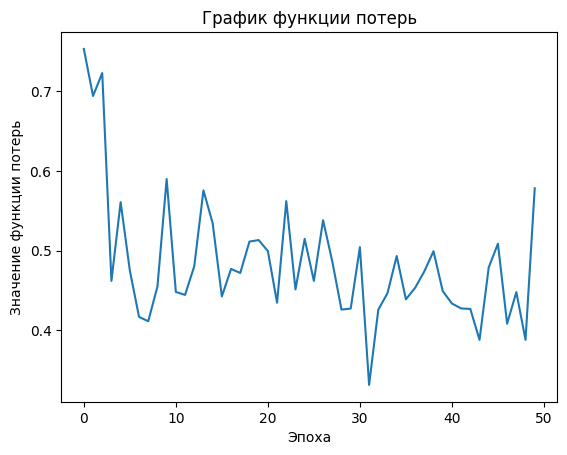

In [96]:
plt.plot(loss_values)
plt.xlabel('Эпоха')
plt.ylabel('Значение функции потерь')
plt.title('График функции потерь')
plt.show()

In [97]:
y_pred = model(torch.from_numpy(X_test).type(torch.float32))
y_pred

tensor([[-6.4963e-01, -3.7745e+00, -7.8787e-01],
        [-4.9447e+00, -7.1480e-03, -1.3643e+01],
        [-8.2868e-01, -7.0326e+00, -5.7538e-01],
        ...,
        [-6.9876e-01, -1.1354e+01, -6.8759e-01],
        [-6.2135e-02, -1.4199e+01, -2.8094e+00],
        [-4.6998e+00, -3.3930e-02, -3.7188e+00]],
       grad_fn=<LogSoftmaxBackward0>)

In [98]:
y_pred_arg = [torch.argmax(pred).numpy() for pred in y_pred]
y_pred_arg

[array(0, dtype=int64),
 array(1, dtype=int64),
 array(2, dtype=int64),
 array(1, dtype=int64),
 array(0, dtype=int64),
 array(0, dtype=int64),
 array(1, dtype=int64),
 array(2, dtype=int64),
 array(0, dtype=int64),
 array(1, dtype=int64),
 array(2, dtype=int64),
 array(2, dtype=int64),
 array(0, dtype=int64),
 array(1, dtype=int64),
 array(1, dtype=int64),
 array(0, dtype=int64),
 array(0, dtype=int64),
 array(2, dtype=int64),
 array(2, dtype=int64),
 array(2, dtype=int64),
 array(1, dtype=int64),
 array(0, dtype=int64),
 array(1, dtype=int64),
 array(2, dtype=int64),
 array(2, dtype=int64),
 array(1, dtype=int64),
 array(0, dtype=int64),
 array(1, dtype=int64),
 array(2, dtype=int64),
 array(0, dtype=int64),
 array(2, dtype=int64),
 array(0, dtype=int64),
 array(2, dtype=int64),
 array(2, dtype=int64),
 array(0, dtype=int64),
 array(2, dtype=int64),
 array(0, dtype=int64),
 array(1, dtype=int64),
 array(2, dtype=int64),
 array(2, dtype=int64),
 array(1, dtype=int64),
 array(0, dtype=

In [99]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_arg)) 

              precision    recall  f1-score   support

         0.0       0.73      0.70      0.72      5246
         1.0       0.94      0.97      0.95      5221
         2.0       0.72      0.73      0.72      5327

    accuracy                           0.80     15794
   macro avg       0.80      0.80      0.80     15794
weighted avg       0.80      0.80      0.80     15794

